# 

In [1]:
import pandas as pd
import numpy as np
import os

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv("../data/processed/top_hawks_2122.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,group_name,pts,ast,reb,player1,player2
0,J. Collins - T. Young,66.8,15.1,25.8,J. Collins,T. Young
1,T. Young - D. Hunter,64.3,14.0,23.9,T. Young,D. Hunter
2,C. Capela - T. Young,61.1,13.3,23.9,C. Capela,T. Young
3,C. Capela - W. Iwundu,65.0,12.0,23.0,C. Capela,W. Iwundu
4,B. Bogdanovic - C. Brown Jr.,53.0,11.0,26.0,B. Bogdanovic,C. Brown Jr.


In [157]:
df.player1.value_counts()

T. Young         22
B. Bogdanovic    22
C. Capela        20
J. Collins       19
O. Okongwu       18
K. Huerter       17
D. Gallinari     15
D. Hunter        15
Name: player1, dtype: int64

### Adding Boolean for lineups that have Young and lines ups that do not
From here we will show base visualizations and data on points, assists and rebounds for line ups that include Young and lineups that do not.

In [4]:
df['trae'] = (df.group_name.str.contains('T. Young', na=False) == True) 
df.head()
#df['trae'].value_counts()
df['trae'] = df['trae'].astype(int)
df['trae'].value_counts()

0    119
1     29
Name: trae, dtype: int64

In [36]:
x = df[df['trae'] == 0].ast.mean()
#Among this group, non-Young pairings average 5.11 assists/game
y = df[df['trae'] == 1].ast.mean()
#Among this group, Young pairings average 7.83 assists/game
df.groupby(by='trae').ast.mean().pct_change()
#This means that when players are paired with Young, as opposed to other players, they execute 53% more rebounds per game. 

trae
0         NaN
1    0.530453
Name: ast, dtype: float64

In [35]:
df[df['trae'] == 0].pts.mean()
#Among this group, non-Young pairings average 23.94 points/game
df[df['trae'] == 1].pts.mean()
#Among this group, Young pairings average 37.24 points/game 
df.groupby(by='trae').pts.mean().pct_change()
#This means that when players are paired with Young, as opposed to other players, they execute 55.5% more points per game. 

trae
0         NaN
1    0.555284
Name: pts, dtype: float64

In [11]:
df[df['trae'] == 0].reb.mean()
#Among this group, non-Young pairings average 9.46 rebounds/game
df[df['trae'] == 1].reb.mean()
#Among this group, Young pairings average 13.72 rebounds/game 
df.groupby(by='trae').reb.mean().pct_change()
#This means that when players are paired with Young, as opposed to other players, they execute 44.9% more rebounds per game. 

13.720689655172414

In [34]:
df.groupby(by='trae').reb.mean().pct_change()

trae
0         NaN
1    0.449798
Name: reb, dtype: float64

### Now lets visualize all these numbers

In [37]:
copied = df.copy()

In [38]:
copied.head()
copied = copied.drop(['group_name', 'player1', 'player2'],1)
copied.head()

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_88927/1715739520.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,pts,ast,reb,trae
0,66.8,15.1,25.8,1
1,64.3,14.0,23.9,1
2,61.1,13.3,23.9,1
3,65.0,12.0,23.0,0
4,53.0,11.0,26.0,0


### Here I am setting the stage for making a grouped bar chart in plotnine, including: 
* Using pd.melt to move 'pts' 'ast' and 'reb' to a single column, rather than three separate ones
* Replacing the new column name ('Variable') with an empty string so that I don't have to worry about renaming my key later
* Renaming the values in the new column so that they read clearly in the final key

In [109]:
#top_players
# Name is id_vars and Course is value_vars
#pd.melt(df, id_vars =['Name'], value_vars =['Course'])
melted = pd.melt(copied, id_vars=['trae'], value_vars=['pts', 'ast', 'reb'])
melted.head()

,trae,variable,value
0,1,pts,66.8
1,1,pts,64.3
2,1,pts,61.1
3,0,pts,65.0
4,0,pts,53.0


In [110]:
melted.rename(columns={'variable': 'stat'}, inplace=True) 
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [111]:
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
melted['stat'].replace({
    'pts': 'Points',
    'ast': 'Assists',
    'reb': 'Rebounds'}, inplace=True)

In [112]:
melted.head()

,trae,stat,value
0,1,Points,66.8
1,1,Points,64.3
2,1,Points,61.1
3,0,Points,65.0
4,0,Points,53.0


In [113]:
melted['trae'].replace({
    0: 'Without Young',
    1: 'With Young'}, inplace=True)

In [114]:
melted.head()

,trae,stat,value
0,With Young,Points,66.8
1,With Young,Points,64.3
2,With Young,Points,61.1
3,Without Young,Points,65.0
4,Without Young,Points,53.0


In [151]:
melted.rename(columns={'trae': ''}, inplace=True) 


### Time to plot! 
This grouped bar chart shows the average assits, points and rebounds per game for top Hawks players when assessed in pairs. The two groups represent pairs that include Trae Young (19 total pairs) and pairs that do not include Trae Young (119 total pairs). 

In [119]:
from plotnine import *


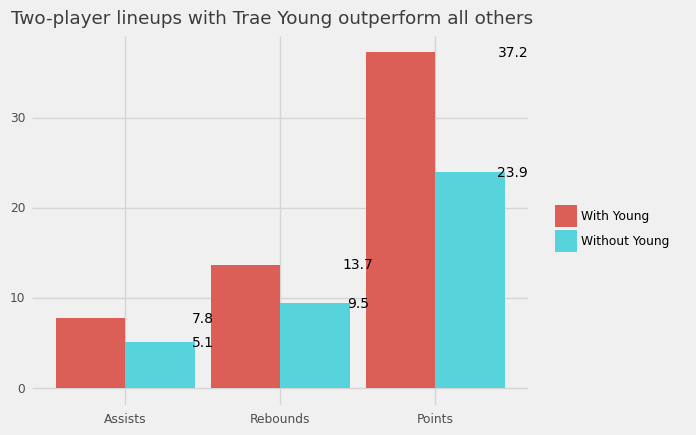

<ggplot: (302630459)>

In [154]:
# my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
#                                                          angle=90, hjust=.5),
#                            axis_text_y = p9.element_text(color="grey", size=10))
(
    ggplot(melted)
    #+ aes(x='trae', y='value', fill='stat')
    + aes(x='reorder(stat, value)', y='value', fill='')
    + geom_bar(stat='summary', fun_y=np.mean, position='dodge')
    + theme_538()
    + stat_summary(
        aes(label=after_stat('round(y, 1)')),
        geom='text',
        fun_y=np.mean,
        nudge_x=0.5,
        size=10)
    + labs(
            title = "Two-player lineups with Trae Young outperform all others",
            subtitle = "",
            y = '',
            x = '')
)

#QUESTIONS: 
    # struggling to move these bar annotations to the center of each bar, rather than of each line
    # struggling to figure out theme overrides/replacements, but i would like to:
        # remove numbers on Y axis
        # change the colors of the bars
        # add a subhead!! 

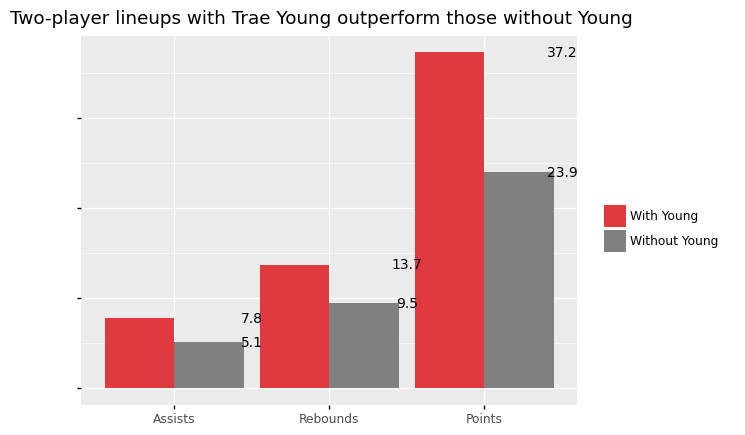

<ggplot: (302630186)>

In [155]:
(
    ggplot(melted)
    #+ aes(x='trae', y='value', fill='stat')
    + aes(x='reorder(stat, value)', y='value', fill='')
    + geom_bar(stat='summary', fun_y=np.mean, position='dodge')
    + theme(axis_text_y=element_text(color='white'))
    + stat_summary(
        aes(label=after_stat('round(y, 1)')),
        geom='text', position = position_stack(vjust = 0.5),
        fun_y=np.mean,
        nudge_x=0.5,
        size=10)
    + scale_fill_manual(values=['#E03A3E', 'gray'])
  #  + geom_text(position=position_stack(vjust=0.5))
    + labs(
            title = "Two-player lineups with Trae Young outperform those without Young",
            subtitle = "",
            y = '',
            x = '')
)

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: trae_and_non_trae.png


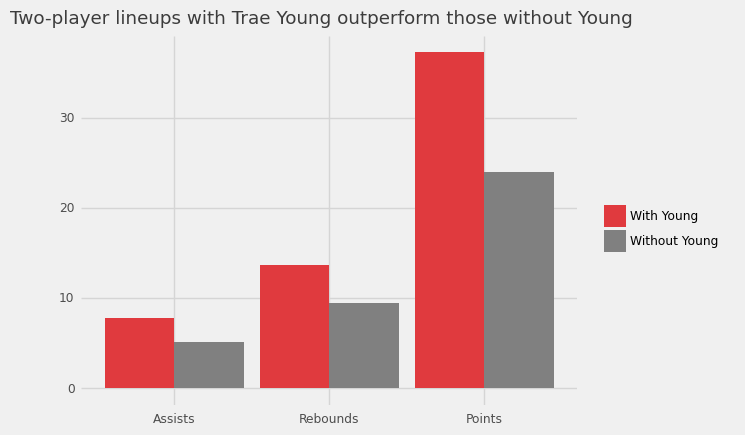

<ggplot: (303081953)>

In [158]:
chart = (
    ggplot(melted)
    #+ aes(x='trae', y='value', fill='stat')
    + aes(x='reorder(stat, value)', y='value', fill='')
    + geom_bar(stat='summary', fun_y=np.mean, position='dodge')
    + theme_538()
# NOTE: These commands will enable labels on the bars and eliminate labels on the y-axis
# Ultimately, I decided the version below reads best, but this code can be helpful for future application:
#    + theme(axis_text_y=element_text(color='white'))
#     + stat_summary(
#         aes(label=after_stat('round(y, 1)')),
#         geom='text', position = position_stack(vjust = 0.5),
#         fun_y=np.mean,
#         nudge_x=0.5,
#         size=10)
    + scale_fill_manual(values=['#E03A3E', 'gray'])
  #  + geom_text(position=position_stack(vjust=0.5))
    + labs(
            title = "Two-player lineups with Trae Young outperform those without Young",
            subtitle = "",
            y = '',
            x = '')
)
chart.save("trae_and_non_trae.png")
chart